In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
path = "C:/Users/Ansari Aaquib/Downloads/UCI/mall.csv"

In [4]:
mall = pd.read_csv(path)

In [5]:
print(mall)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [6]:
mall = mall.rename(columns={'Annual Income (k$)': 'income','Spending Score (1-100)':'score'})

In [7]:
mall.head()

,CustomerID,Genre,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
x = np.array(mall[['income','score']].values)

In [9]:
print(x)

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [11]:
mall.isnull().sum()

CustomerID    0
Genre         0
Age           0
income        0
score         0
dtype: int64

In [13]:
mall.isna().sum()

CustomerID    0
Genre         0
Age           0
income        0
score         0
dtype: int64

In [14]:
def buildmodel(data):
    
    wcss = []
    
    models = []
    
    
    list_k = range(2,11)
    
    for k in list_k:
        model = KMeans(n_clusters=k).fit(data)
        
        wcss.append(model.inertia_)
        
        models.append(model)
    return(wcss,models)

In [15]:
wcss,models = buildmodel(x)
print(wcss)

Text(0, 0.5, 'WCSS')

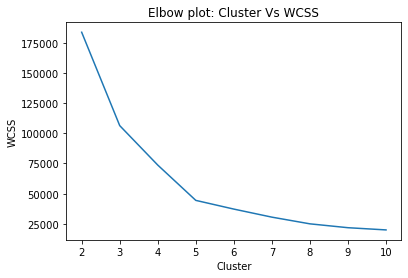

In [16]:
plt.plot(range(2,11),wcss)
plt.title("Elbow plot: Cluster Vs WCSS")
plt.xlabel('Cluster')
plt.ylabel('WCSS')

In [20]:
optk = 5
m1 = KMeans(n_clusters=optk)


In [21]:
cluster = m1.fit_predict(x)
print(cluster)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [23]:
np.unique(cluster)

array([0, 1, 2, 3, 4])

In [25]:
mall['cluster'] = cluster

In [26]:
print(mall)

     CustomerID   Genre  Age  income  score  cluster
0             1    Male   19      15     39        3
1             2    Male   21      15     81        0
2             3  Female   20      16      6        3
3             4  Female   23      16     77        0
4             5  Female   31      17     40        3
..          ...     ...  ...     ...    ...      ...
195         196  Female   35     120     79        2
196         197  Female   45     126     28        4
197         198    Male   32     126     74        2
198         199    Male   32     137     18        4
199         200    Male   30     137     83        2

[200 rows x 6 columns]


Text(0, 0.5, 'Score')

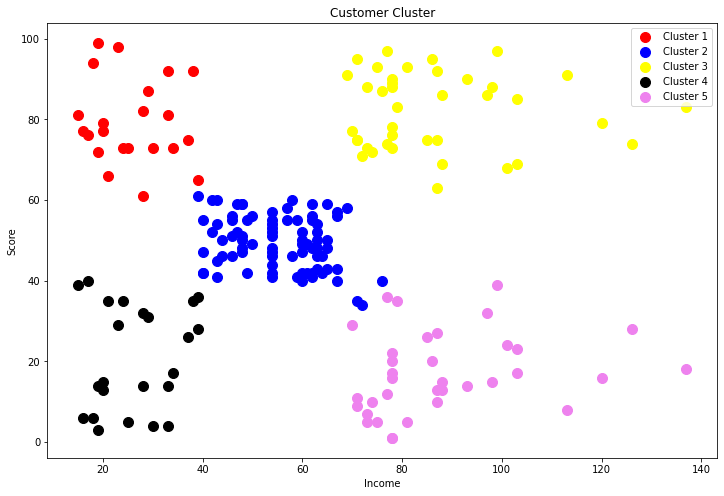

In [31]:
plt.scatter(mall.income[mall.cluster==0],mall.score[mall.cluster==0],s=100,c='red',label='Cluster 1')
plt.scatter(mall.income[mall.cluster==1],mall.score[mall.cluster==1],s=100,c='blue',label='Cluster 2')
plt.scatter(mall.income[mall.cluster==2],mall.score[mall.cluster==2],s=100,c='yellow',label='Cluster 3')
plt.scatter(mall.income[mall.cluster==3],mall.score[mall.cluster==3],s=100,c='black',label='Cluster 4')
plt.scatter(mall.income[mall.cluster==4],mall.score[mall.cluster==4],s=100,c='violet',label='Cluster 5')
plt.title("Customer Cluster")
plt.legend()
plt.xlabel('Income')
plt.ylabel('Score')

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8